Question 4 -
Write a program to download the data from the link given below and then read the data and convert the into
the proper structure and return it as a CSV file.
Link - https://data.nasa.gov/resource/y77d-th95.json
Note - Write code comments wherever needed for code understanding

In [1]:
import pandas as pd

In [119]:
import requests
import csv

#url to download the data
url = "https://data.nasa.gov/resource/y77d-th95.json"
# Specify the output file name
output_csv = "nasa_data.csv"

def download_data(url):
    # Get the data from the url
    response = requests.get(url)
    #extract the response data from json and store it in variable data
    data = response.json()
    return data

def save_as_csv(data,output_csv):

    fieldnames = ['name', 'id', 'nametype', 'recclass', 'mass', 'year', 'reclat', 'reclong', 'coordinates']

    with open (output_csv,'w',newline='', encoding='utf-8') as csv_file:
        writer = csv.DictWriter(csv_file,fieldnames=fieldnames)
        # write the header in the output csv file
        writer.writeheader()
        #fetch the row data and store it in output csv
        for row in data:
            # Extract the desired attributes from the row
            name = row.get('name')
            id = row.get('id')
            nametype = row.get('nametype')
            recclass = row.get('recclass')
            mass = row.get('mass (g)')
            year = row.get('year')
            reclat = row.get('reclat')
            reclong = row.get('reclong')
            coordinates = [row.get('reclat'), row.get('reclong')]

            # Write the extracted attributes to the CSV file
            writer.writerow({
                'name': name,
                'id': id,
                'nametype': nametype,
                'recclass': recclass,
                'mass': mass,
                'year': year,
                'reclat': reclat,
                'reclong': reclong,
                'coordinates': coordinates
            })

    print(f"Downloaded Data and Successfully stored in csv: {output_csv}")

# download the data    
data = download_data(url)
# Convert and save the data as CSV
save_as_csv(data,output_csv)


Downloaded Data and Successfully stored in csv: nasa_data.csv


Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all the Earth meteorites that fell before the year 2000
● Get all the earth meteorites co-ordinates who fell before the year 1970
● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

In [120]:
df=pd.read_csv("nasa_data.csv")
df


,name,id,nametype,recclass,mass,year,reclat,reclong,coordinates
0,Aachen,1,Valid,L5,NaN,1880-01-01T00:00:00.000,50.77500,6.08333,"['50.775000', '6.083330']"
1,Aarhus,2,Valid,H6,NaN,1951-01-01T00:00:00.000,56.18333,10.23333,"['56.183330', '10.233330']"
2,Abee,6,Valid,EH4,NaN,1952-01-01T00:00:00.000,54.21667,-113.00000,"['54.216670', '-113.000000']"
3,Acapulco,10,Valid,Acapulcoite,NaN,1976-01-01T00:00:00.000,16.88333,-99.90000,"['16.883330', '-99.900000']"
4,Achiras,370,Valid,L6,NaN,1902-01-01T00:00:00.000,-33.16667,-64.95000,"['-33.166670', '-64.950000']"
...,...,...,...,...,...,...,...,...,...
995,Tirupati,24009,Valid,H6,NaN,1934-01-01T00:00:00.000,13.63333,79.41667,"['13.633330', '79.416670']"
996,Tissint,54823,Valid,Martian (shergottite),NaN,2011-01-01T00:00:00.000,29.48195,-7.61123,"['29.481950', '-7.611230']"
997,Tjabe,24011,Valid,H6,NaN,1869-01-01T00:00:00.000,-7.08333,111.53333,"['-7.083330', '111.533330']"
998,Tjerebon,24012,Valid,L5,NaN,1922-01-01T00:00:00.000,-6.66667,106.58333,"['-6.666670', '106.583330']"


In [70]:
df["year"]

0      1880-01-01T00:00:00.000
1      1951-01-01T00:00:00.000
2      1952-01-01T00:00:00.000
3      1976-01-01T00:00:00.000
4      1902-01-01T00:00:00.000
                ...           
995    1934-01-01T00:00:00.000
996    2011-01-01T00:00:00.000
997    1869-01-01T00:00:00.000
998    1922-01-01T00:00:00.000
999    1905-01-01T00:00:00.000
Name: year, Length: 1000, dtype: object

In [71]:
df["year1"]=df["year"].str.split("-").str[0]

In [72]:
df.head()

,name,id,nametype,recclass,mass,year,reclat,reclong,coordinates,year1
0,Aachen,1,Valid,L5,NaN,1880-01-01T00:00:00.000,50.77500,6.08333,"['50.775000', '6.083330']",1880
1,Aarhus,2,Valid,H6,NaN,1951-01-01T00:00:00.000,56.18333,10.23333,"['56.183330', '10.233330']",1951
2,Abee,6,Valid,EH4,NaN,1952-01-01T00:00:00.000,54.21667,-113.00000,"['54.216670', '-113.000000']",1952
3,Acapulco,10,Valid,Acapulcoite,NaN,1976-01-01T00:00:00.000,16.88333,-99.90000,"['16.883330', '-99.900000']",1976
4,Achiras,370,Valid,L6,NaN,1902-01-01T00:00:00.000,-33.16667,-64.95000,"['-33.166670', '-64.950000']",1902


In [73]:
df.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass           1000
year              1
reclat           12
reclong          12
coordinates       0
year1             1
dtype: int64

In [76]:
data=df.copy()

In [77]:
data["year1"].mode()[0]

'1933'

In [78]:
data["year1"]=data["year1"].fillna(data["year1"].mode()[0])

In [79]:
data["year1"].isnull().sum()

0

In [81]:
data["year1"]=data["year1"].astype(int)

In [82]:
data["year1"].dtype

dtype('int32')

In [85]:
data[data["year1"]<2000]

,name,id,nametype,recclass,mass,year,reclat,reclong,coordinates,year1
0,Aachen,1,Valid,L5,NaN,1880-01-01T00:00:00.000,50.77500,6.08333,"['50.775000', '6.083330']",1880
1,Aarhus,2,Valid,H6,NaN,1951-01-01T00:00:00.000,56.18333,10.23333,"['56.183330', '10.233330']",1951
2,Abee,6,Valid,EH4,NaN,1952-01-01T00:00:00.000,54.21667,-113.00000,"['54.216670', '-113.000000']",1952
3,Acapulco,10,Valid,Acapulcoite,NaN,1976-01-01T00:00:00.000,16.88333,-99.90000,"['16.883330', '-99.900000']",1976
4,Achiras,370,Valid,L6,NaN,1902-01-01T00:00:00.000,-33.16667,-64.95000,"['-33.166670', '-64.950000']",1902
...,...,...,...,...,...,...,...,...,...,...
994,Timochin,24004,Valid,H5,NaN,1807-01-01T00:00:00.000,54.50000,35.20000,"['54.500000', '35.200000']",1807
995,Tirupati,24009,Valid,H6,NaN,1934-01-01T00:00:00.000,13.63333,79.41667,"['13.633330', '79.416670']",1934
997,Tjabe,24011,Valid,H6,NaN,1869-01-01T00:00:00.000,-7.08333,111.53333,"['-7.083330', '111.533330']",1869
998,Tjerebon,24012,Valid,L5,NaN,1922-01-01T00:00:00.000,-6.66667,106.58333,"['-6.666670', '106.583330']",1922


In [98]:
data=data.drop("year2",axis=1)

In [102]:
data[(data["year1"]<1970) & (data["coordinates"])]

,name,id,nametype,recclass,mass,year,reclat,reclong,coordinates,year1
0,Aachen,1,Valid,L5,NaN,1880-01-01T00:00:00.000,50.77500,6.08333,"['50.775000', '6.083330']",1880
1,Aarhus,2,Valid,H6,NaN,1951-01-01T00:00:00.000,56.18333,10.23333,"['56.183330', '10.233330']",1951
2,Abee,6,Valid,EH4,NaN,1952-01-01T00:00:00.000,54.21667,-113.00000,"['54.216670', '-113.000000']",1952
4,Achiras,370,Valid,L6,NaN,1902-01-01T00:00:00.000,-33.16667,-64.95000,"['-33.166670', '-64.950000']",1902
5,Adhi Kot,379,Valid,EH4,NaN,1919-01-01T00:00:00.000,32.10000,71.80000,"['32.100000', '71.800000']",1919
...,...,...,...,...,...,...,...,...,...,...
994,Timochin,24004,Valid,H5,NaN,1807-01-01T00:00:00.000,54.50000,35.20000,"['54.500000', '35.200000']",1807
995,Tirupati,24009,Valid,H6,NaN,1934-01-01T00:00:00.000,13.63333,79.41667,"['13.633330', '79.416670']",1934
997,Tjabe,24011,Valid,H6,NaN,1869-01-01T00:00:00.000,-7.08333,111.53333,"['-7.083330', '111.533330']",1869
998,Tjerebon,24012,Valid,L5,NaN,1922-01-01T00:00:00.000,-6.66667,106.58333,"['-6.666670', '106.583330']",1922


In [104]:
df["mass"].isnull().sum()

1000

In [99]:
data.head()

,name,id,nametype,recclass,mass,year,reclat,reclong,coordinates,year1
0,Aachen,1,Valid,L5,NaN,1880-01-01T00:00:00.000,50.77500,6.08333,"['50.775000', '6.083330']",1880
1,Aarhus,2,Valid,H6,NaN,1951-01-01T00:00:00.000,56.18333,10.23333,"['56.183330', '10.233330']",1951
2,Abee,6,Valid,EH4,NaN,1952-01-01T00:00:00.000,54.21667,-113.00000,"['54.216670', '-113.000000']",1952
3,Acapulco,10,Valid,Acapulcoite,NaN,1976-01-01T00:00:00.000,16.88333,-99.90000,"['16.883330', '-99.900000']",1976
4,Achiras,370,Valid,L6,NaN,1902-01-01T00:00:00.000,-33.16667,-64.95000,"['-33.166670', '-64.950000']",1902


uestion 9 -
Write a program to read the data from the following link, perform data analysis and answer the following
questions
Note -
1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
Insights to be drawn -
● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
● Get all TESLA cars with the model year, and model type made in Bothell City.
● Get all the cars that have an electric range of more than 100, and were made after
2015
● Draw plots to show the distribution between city and electric vehicle type

In [9]:
df1=pd.read_csv("Electric_Vehicle_Population_Data.csv")
df1.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [10]:
df1.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                222
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 305
DOL Vehicle ID                                         0
Vehicle Location                                      33
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [28]:
# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
non_clean_fuel_cars = df1[df1['Clean Alternative Fuel Vehicle (CAFV) Eligibility']!="Clean Alternative Fuel Vehicle Eligible"]
non_clean_fuel_cars_info = non_clean_fuel_cars[['Make', 'Model', 'Model Year']]
print("Cars that do not qualify for clean alternative fuel vehicle:")
non_clean_fuel_cars_info

Cars that do not qualify for clean alternative fuel vehicle:


,Make,Model,Model Year
6,FORD,FUSION,2016
7,AUDI,Q5 E,2023
8,FORD,C-MAX,2014
11,TESLA,MODEL Y,2022
14,FORD,C-MAX,2017
...,...,...,...
130437,BMW,530E,2021
130438,TESLA,MODEL Y,2023
130439,NISSAN,LEAF,2022
130440,TESLA,MODEL Y,2021


In [26]:
# Get all TESLA cars with the model year, and model type made in Bothell City
tesla_bothell_cars = df1[(df1['Make'] == 'TESLA') & (df1['City'] == 'Bothell') ]
tesla_bothell_cars_info = tesla_bothell_cars[['Model Year', 'Model']]
print("\nTESLA cars made in Bothell City:")
tesla_bothell_cars_info



TESLA cars made in Bothell City:


,Model Year,Model
39,2020,MODEL 3
217,2022,MODEL 3
218,2022,MODEL Y
222,2018,MODEL 3
292,2017,MODEL X
...,...,...
129778,2019,MODEL 3
129954,2021,MODEL 3
129976,2014,MODEL S
130295,2022,MODEL 3


<Figure size 1200x600 with 0 Axes>

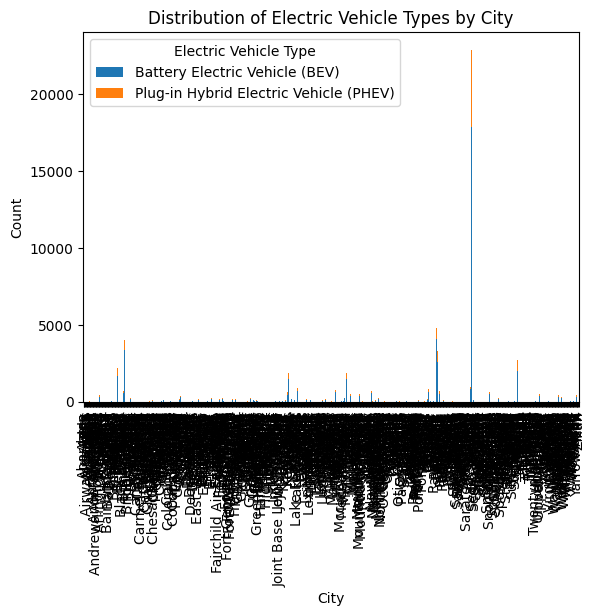

In [29]:
# Draw plots to show the distribution between city and electric vehicle type
plt.figure(figsize=(12, 6))
city_ev_type_counts = df1.groupby(['City', 'Electric Vehicle Type']).size().unstack()
city_ev_type_counts.plot(kind='bar', stacked=True)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicle Types by City')
plt.legend(title='Electric Vehicle Type')
plt.show()
